# Analysis Workflow

In this workshop we will take a more systematic approach to your analysis and modelling process. While in the past few tutorials we have focused on specific methods, here we explore the steps we should take to ensure that the model we develop is of high quality, unswayed by unhelpful attributes, and robust to unseen data. 

The workflow we will undertake is structured as follows - which takes us from data import through to the presentation of our results.

1. Import Data 
2. Standardisation
3. Feature Selection
4. Reorganisation of Data
5. Model Development (inc. Validation)
6. Visualisation

It is important to point out that the full analytical process will often extend beyond these six stages. For example, we are not undertaking initial analysis or contextualisation of the imported data, nor are we writing any of our results back to a database. These are stages that are generally very important, but skipped over this week (because we covered them in depth a few weeks ago).

Today we'll work towards developing a classification model, but the approach could also be applied to regression or clustering. Once more we'll be drawing on much of the useful functionality in `scikit-learn`, so as usual,** let's start by importing the libraries that we'll need today**.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

/usr/lib64/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Data Import

This week we'll work with a dataset describing the characteristics and types of wine. This may not seem very related to spatial data - in fact, it isn't - in the slightest - but it is a nice, simple, clean dataset that we can get started with very quickly. The aim of our work here today is quite simple - to predict the type of wine from its attributes.

The dataset is multivariate, meaning it contains a number of different attributes, 14 in this case, and the majority of these are numeric. This means we'll have to put some work into standardisation and feature selection before we start work.

Based on what you've learnt over the past few weeks, firstly **read over the metadata about the wine dataset on Moodle**, then **import the dataset**. 

In [4]:
wine = pd.read_csv("wine.csv")
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065
1,1,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050
2,1,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185
3,1,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480
4,1,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735


In [5]:
wine.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,1.9382,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.7750,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,1.0000,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,1.0000,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,2.0000,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,3.0000,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,3.0000,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,"1,680.0000"


**Create a scatter plot of all of the attributes, and observe which ones appear suggest strong covariance.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d6e5f2490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3d68ac8490>]], dtype=object)

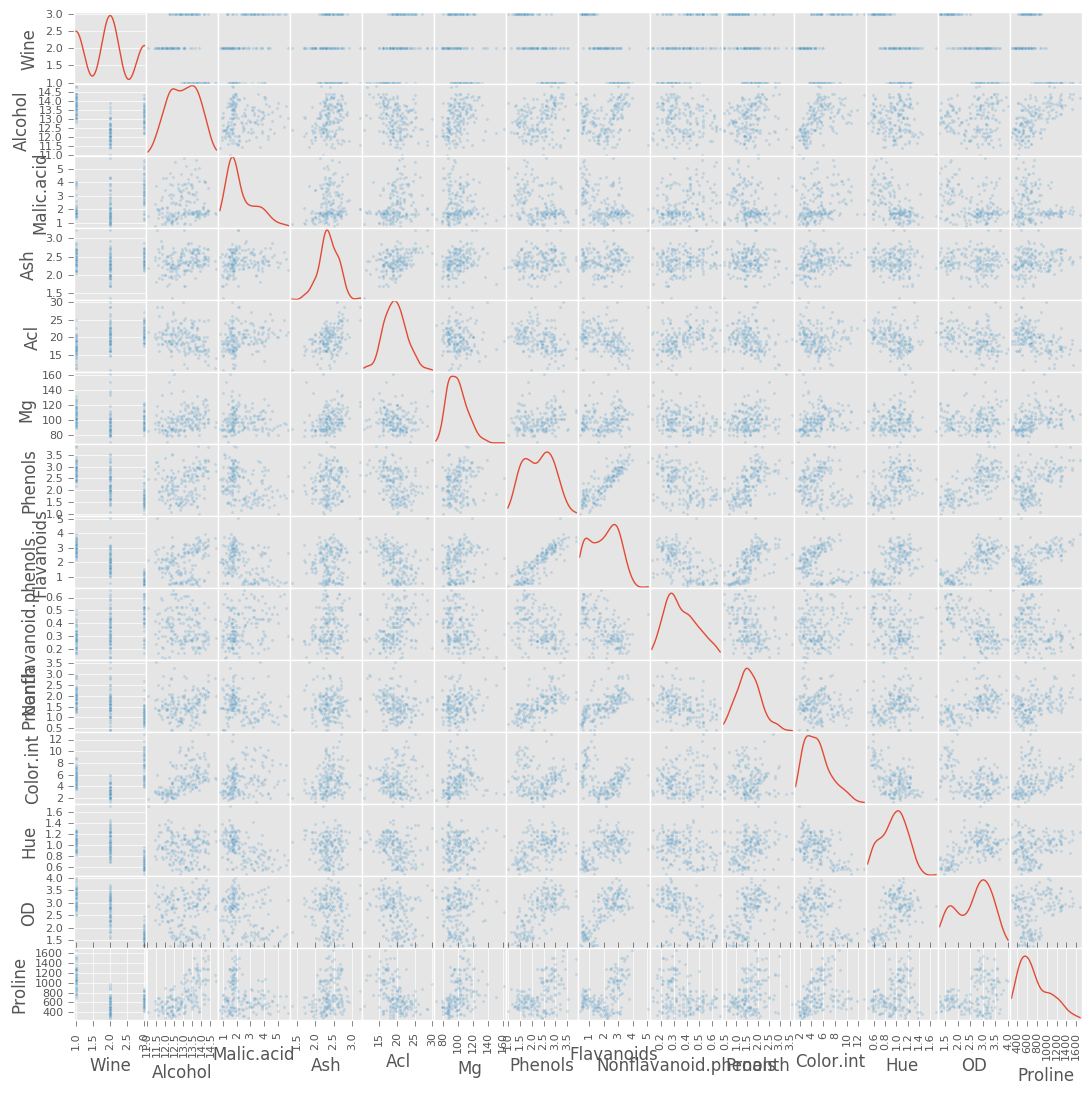

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(wine, alpha=0.2, figsize=(13, 13), diagonal='kde')

Next, **separate the dataframe into label (`Wine`) and attribute dataframes**.

In [7]:
wine2 = wine.iloc[:,1:12]
wine2.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue
0,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400
1,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500
2,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300
3,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600
4,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400


In [8]:
label = wine.iloc[:,0]
label.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

**Create a labels dataset using `LabelEncoder`**. Make sure to check the resulting dataset for correctness.

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(label)
print(le.classes_)

[1 2 3]


### Standardisation

If you inspect the data, you'll quickly see that many of the attributes scale in different ways. The `Proline` attribute scales in the thousands, while `Hue` scales over tenths. Applying any distance based algorithm across data at such different scales is tricky - as no common distance threshold is likely to be suitable across two or more attributes. As such, our model is not likely to match the data very well.

Standardisation brings scaling down to a common range. If we employ range scaling, then this will be between 0 and 1, but may be suseptible to the effect of outliers. In our case, we'll use **Z-scores**, which repositions data according to the number of standard deviations from the mean.

We can do this with `scikit`, but it's pretty easy to implement with Pandas too. Plus, `scikit` will insist on converting the data to an array, which means we lose our metadata. So let's code this ourselves.

The formula you need to calculate the Z-score for each attribute is `(x - Mean(X) / SD(X)`.

**Implement this below (using Pandas commands) and execute it on the attributes dataframe.**

In [22]:
from scipy.stats import zscore
wine_standard = wine2.apply(zscore)

Now, **explore how the data has changed**. Check out how the mean and variance for each attribute has changed too.

In [23]:
wine_standard.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028
min,-2.4342,-1.4330,-3.6792,-2.6710,-2.0883,-2.1072,-1.6960,-1.8682,-2.0690,-1.6343,-2.0947
25%,-0.7882,-0.6587,-0.5721,-0.6891,-0.8244,-0.8855,-0.8275,-0.7401,-0.5973,-0.7951,-0.7676
50%,0.0610,-0.4231,-0.0238,0.0015,-0.1223,0.0960,0.1061,-0.1761,-0.0629,-0.1592,0.0331
75%,0.8361,0.6698,0.6981,0.6021,0.5096,0.8090,0.8491,0.6095,0.6292,0.4940,0.7132
max,2.2598,3.1092,3.1563,3.1545,4.3714,2.5395,3.0628,2.4024,3.4851,3.4354,3.3017


### Feature Selection

Now that we have standardised all of our attributes, the next step is to slim down the number of attributes we have. We do this as it removes potentially unhelpful attributes which might lead to a poor model fit. 

In this case I'm going to suggest that we use **Principal Components Analysis (PCA)**. PCA is an approach for reducing the complexity of a dataset into only its most important elements. It is capable of converting an array of feature attributes into fewer components which capture much of the variance within the whole dataset. This reduces the potential impact of less useful attributes, and focuses our analysis on only the most differentiating attributes. This makes PCA a good friend of classification modelling.

The only issue with PCA is that we end up with components that don't mean very much. PCA produces components which are dimensions through the data which maximises variance. These datasets are potentially produces of all of the attributes we use in the model.

The `scikit` PCA imlementation requires the data to be passed in matrix form. Converting between Pandas dataframe and a matrix is easy though - we simply use the `as_matrix()` function. **Check and run the code below to execute this.**

In [24]:
at_mat = wine_standard.as_matrix()

Next, **let's import the PCA library.**

In [26]:
from sklearn.decomposition import PCA

We now have everything we need to build our PCA. Doing so is actually incredibly easy - you first create the PCA class object, and then you run the `.fit_transform()` function to execute PCA on our data matrix. The addition of `transform` to the `fit` function means that we fit our model, but we also transform the data into the reduced dimensions. If you want to observe the difference then try both functions and observe the output.

**Look at the code below and then run it to decomposed your dataset.**

**NOTE**: More information on the full functionality of the `scikit` PCA implementation and derived statistics can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [27]:
pca = PCA() # create PCA class object
at_decomp = pca.fit_transform(at_mat) # run PCA and write components back to array at_decomp

Now that the decomposed dataset has now been written to `at_decomp`, we should start investigating the results. The first test we should always run is the `.explained_variance_ratio_` function. This tells us how many components have been identified and how much variance has been explained by each of our components.

**Run the `.explained_variance_ratio_` function on the `pca` object below.**

In [30]:
pca.explained_variance_ratio_

array([ 0.33940622,  0.19637694,  0.12585369,  0.07734443,  0.07406689,
        0.05353626,  0.04972981,  0.03143388,  0.02297457,  0.01960269,
        0.00967461])

This shows us that 13 components have been created, each with greater or lesser explanability. Clearly, our first few components looks useful, as they capture much of the variance (almost 80% of variance is explained by the first five components).

Assessing how many components we should keep is a matter of judgement. How much variance do you think we should maintain to 1) ensure we retain as much of the explainability as we can in the data, and 2) remove the impact of poor explanatory components? 

**So, make your judgement, then calculate which components you wish to keep, and finally create a new array subset of the `at_decomp` array that only contains those components.** The final array should be a NumPy array, not a Pandas dataframe. 

**Clue**: The subset process is very similar to the Pandas `.iloc[]` command.

We now have ourselves a nicely trimmed and standardised dataset for model development (still 178 records right?!). There's only one last thing to do, and that's to split out data into testing and training datasets.

### Reorganising Data

Before we move onto building our model, we need to reorganise our datasets into the right format and partitions. We did this last week when we were preparing the data for classification. You'll generally have to adapt this process depending on what the classifier requests.

In our case, we already have our data stored as an array, due to our execution of the PCA function, so there is no need to make any conversions like we did last week. All we need to do is split our data into training and testing subsets. 

**Import and execute the `train_test_split` command below. You should use the PCA components and labels you created earlier. The testing partitions should only be 20% of all data.**

You should now have four datasets (two containing attributes, two containing labels). The training dataset and labels should contain 142 entries, and the testing data just 36 records. If that's the case then **AWESOME**, let's move on to modelling!

### Model Development

The process of refining your model through hyperparameter optimisation and cross-validation may sound like a long winded process, and it is. There are potentially hundreds or thousands of loops through different parameter settings and subsets of training data. Running each test manually is obviously a no no, but even the prospect of writing loops and functions to split the data up manually sounds pretty boring.

Luckily, `scikit-learn` is here to ease our workload again. It offers functions for sweeping through parameter ranges, and will combine cross-validation as part of the process. The **`GridSearchCV`** method we will use here will output the best parameter combinations within a range we provide, calculated using cross-validation. We are also able to set the criteria by which we make the fit judgement (e.g. by precision, recall, or other).

So, let's work our way through the code. **First we'll import the `GridSearch` package**.

In [ ]:
from sklearn.grid_search import GridSearchCV

As there isn't too much data, and we know it will work well, we'll develop a Support Vector Machine classifier. **Import the SVM library below.**

The design of `GridSearchCV` requires us to pass it a number of parameters. One requirement is a dictionary of all of the parameters we wish to test. If you recall the SVM approach, we need to specify a *kernel* (usually linear or radial-based), a penalty parameter which increases or decreases the fit around the training data (*C*), and, if we're using a non-linear kernel then a *gamma* setting will determine the 'bendiness' of our line. However, remember that as you increase the fit of the kernel, the potential for overfitting the data to the training set increases. Clearly, when setting up our model, we want to make sure we have the best possible settings of these parameters. That's where `GridSearchCV` helps.

So let's set up our parameters. This takes the format `{parameter_name_1 : setting_1, parameter_name_2 : setting_2 ...}`. I've provided some example settings below. **Execute the script to create the parameter settings.**

In [ ]:
parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]}

The remaining settings we will make when we define the `GridSearchCV` object. This code is provided below.

As the first argument we provide the model (plus any unchanging parameters). 

The second argument are the parameter settings we wish to test, as specified in the dictionary above.

The third argument `cv` relates to cross-validation. Here we provide the number of *k*-folds we wish to divide the data into. In our case we have chosen 5, meaning that during grid search we will train the model using four fifths of the data, and test with the remaining fifth. We will iterate over the different sections of the data and calculate an average score (according to which ever metric we choose).

The fourth argument is our `scoring` metric, and used to determine which parameter combination works best. In our case we'll choose a simple `accuracy` score, which simply measures how often the class if predicted correctly.

Before proceeding, **acquaint yourself with the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) for `GridSearchCV` to see how else you could set up the optimisation process.**

**Once you've done that, create the `GridSearchCV` function according to these settings below.**

In [ ]:
grid_search = GridSearchCV(SVC(), parameters, cv=5, scoring='accuracy')

**Now run it!**

Given we don't have too much data, it shouldn't take long to run all of the combinations of the parameters.

Now you must be itching to find out which of the models is the best performing! This is found using the `grid_scores_` function, which records the score (accuracy in this case) for each setting combination. 

This function returns three parameters - the mean score, the standard deviation score (across the cross-validation partitions), and the parameter settings. 

**Write a short loop function below to extract all mean scores and standard deviations along side the parameter settings.**

Which setting combination performs best?

Great - we have our answer!  Much easier than trying all of those combinations manually...

`GridSearchCV` will save the best combination for your future use. So running a `.predict()` function on the test data will use the best parameter settings. 

**Make predictions for the test data using the best parameter combination, then run a classification report to explore the model performance in more detail.**

For good measure, **create a confusion matrix of the results too**.

So, how well does the model perform? Happy with the results?

**Right, before moving on, you have a few more tasks to complete...**

1. Run the SVM model using different kernel types and parameter settings. Try adding them along side the existing settings (Hint: You can send an array of dictionaries to the `GridSearchCV` function. As you increase the fit of the kernel (through C and gamma), what happens to our precision and recall metrics? What is happening here?
2. Try running the modelling approach on all of the data - that is the data without it being decomposed using PCA. How do the results vary? We expect it to perform less well, but by how much?
3. Implement another classification model using `GridSearchCV` - remember it should be one where there are hyperparameters to optimise!

If you manage all of that then well done!

### Visualisation

So you've fitted your model, and tested it works. All done right? Well, you now need to sell your results! And unfortunately some people just won't be that excited to hear about a 0.99 accuracy score... Visualisation can help both explain our results, and engage observers. 

The difficulty is how do you visualise a model made up of more than three dimensions? Well, the thing is you can't. But there will be instances where you're working with only a couple of attributes (or components), and wish to visualise the results. One nice way of doing this to to plot the boundaries of our model - that is the classification that could be made for any point in 2D space.

To get started on this, we first need to create a model which uses only two dimensions. This process is going to be mostly for you to figure out, and will draw on the Pandas skills you built up over the last few months. First, **create a new training and testing dataset which contains only the first two components from the PCA.**

Next, **run the `GridSearchCV` SVM model on the slimmed down training dataset.**

**Then, extract some predictions for the test labels using this model.**

Once you have your predictions, **next put all of your new datasets (the two-column test data, the predicted label, and the real label) into one dataset. Change the column names to reflect the data.**

Finally, for the purpose of visualising the results, **split your dataset into three parts** - one containing all 'zero' predictions, another for all 'one' predictions, and a third for all 'two' predictions.

The final step is to visualise the results. The visualisation makes a prediction for every grid square, then draws on our predictions into that space. We'll be therefore creating two overlaid visualisations - a `pcolormesh` with a `scatter` on top

Because I'm mean I've removed a few bits of the code, so you'll have to make some additions to make it work... The final chart should look something like that below.

In [ ]:
# set up the figure size
plt.figure(figsize=(9, 6))

# create the plot area for square region around data point range.
x_min, x_max = train_d[:, 0].min() - .5, train_d[:, 0].max() + .5
y_min, y_max = train_d[:, 1].min() - .5, train_d[:, 1].max() + .5

h = .02  # mesh grid size
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# create predictions for every grid square (x, y value) within graph area
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])

# draw the colour mesh from the results
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='brg')

# ADD SCATTER PLOTS FOR EACH CLASS!

# ADD AXIS LABELS, SET THE LIMITS, AND ADD A LEGEND!

We can now see the configuration of the model, which is pretty handy.  Depending on how you've configured your model, you may have some instances of incorrect classification, and therefore be able to observe the points at which the model has not adequately fitted the data.

### In Conclusion...

So that's the end of the analysis workflow. You taken some data, standardised it, selected the most appropriate features, parameterised the model using the best settings, and visualised some of the results. This is the workflow process you should take into all of your analyses from now on.

### Homework

While we have covered the main processes, there are lots of other approaches you can take towards the analysis workflow. I would recommend that you explore some of the following approaches (ranked in order of importance).

- Apply the same process towards the development of a regression model. The process should be very similar, but consider how it might differ.
- Related to the above, explore how you can select features based only on their variance (`scikit` has a function for that). While this would not have been necessary with standardised data, see how it can be applied to raw data.
- Explore some of the alternative visualisation approaches available through Pandas and Matplotlib. I'd advise you have a look at some of the more exotic approaches such as hex bins, Andrews Curves and RadViz. These are probably best applied to the original dataset.
